In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv("mobile.csv")

In [4]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [27]:
data.shape

(1000, 21)

In [37]:
data.ram.describe()

count    1000.000000
mean     2138.998000
std      1088.092278
min       263.000000
25%      1237.250000
50%      2153.500000
75%      3065.500000
max      3989.000000
Name: ram, dtype: float64

In [41]:
def price_range(value):
    if 263.0 <= value <= 1237.25:
        return 0
    if 1237.25 <= value <= 2153.5:
        return 1
    elif 2153.5 <= value < 3065.5:
        return 2
    elif 3065.5 <= value < 3989.0:
        return 3

In [42]:
data['price']=data['ram'].map(price_range)

In [44]:
data.shape

(1000, 22)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [46]:
data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price'],
      dtype='object')

In [47]:
data.duplicated().any()

False

In [48]:
data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price            1
dtype: int64

<AxesSubplot:xlabel='price', ylabel='ram'>

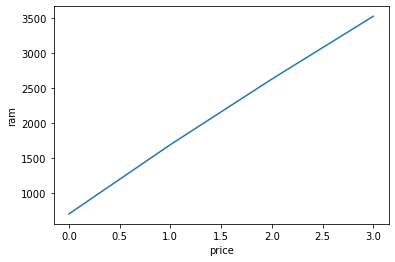

In [51]:
sns.lineplot(x = 'price' , y='ram' ,data = data ,ci = None )

<AxesSubplot:xlabel='price', ylabel='battery_power'>

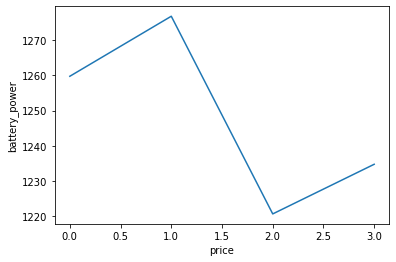

In [52]:
sns.lineplot(data = data , x = 'price' , y='battery_power' ,ci = None )

<AxesSubplot:xlabel='mobile_wt', ylabel='price'>

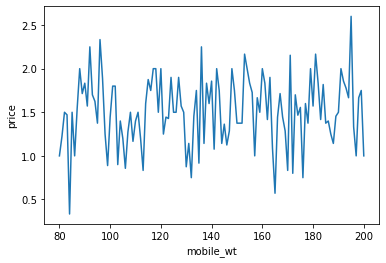

In [53]:
sns.lineplot(data = data , x = 'mobile_wt' , y='price' ,ci = None )

In [54]:
data['blue'].value_counts()

1    516
0    484
Name: blue, dtype: int64

<AxesSubplot:xlabel='blue', ylabel='count'>

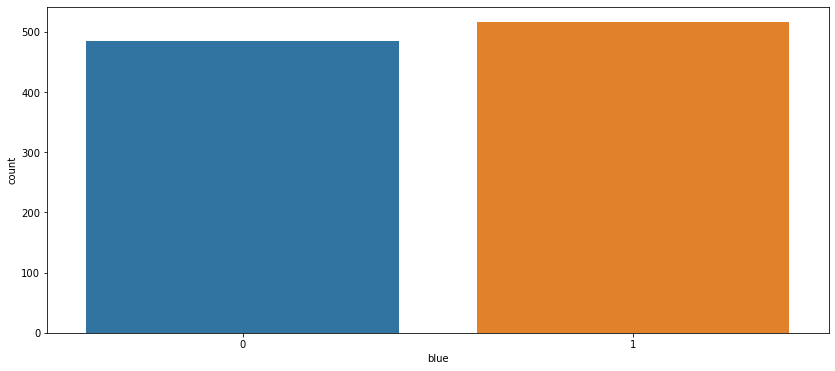

In [55]:
plt.figure(figsize=(14,6))
sns.countplot(data = data ,x= data['blue'])

In [57]:
data.corr()[['price' , 'ram']]

,price,ram
id,-0.035339,-0.043442
battery_power,-0.033994,-0.032366
blue,0.055159,0.057570
clock_speed,0.008816,-0.000650
dual_sim,0.045307,0.048171
fc,-0.042365,-0.051997
four_g,0.045212,0.030821
int_memory,-0.006029,-0.007107
m_dep,0.021770,0.018349
mobile_wt,0.030741,0.028786


In [58]:
data.fc.value_counts().head(10)

0    210
1    124
2     97
4     80
5     74
3     70
6     59
7     50
9     41
8     38
Name: fc, dtype: int64

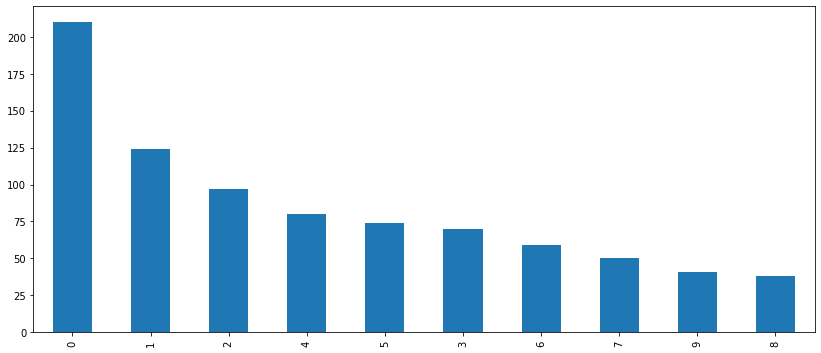

In [59]:
plt.figure(figsize=(14,6))
data.fc.value_counts().head(10).plot(kind = 'bar')
plt.show()

In [60]:
data.corr()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,-0.015935,0.001969,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643,-0.035339
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,0.025732,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414,-0.033994
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,0.003283,-0.025247,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568,0.055159
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,-0.012247,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593,0.008816
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,-0.003129,0.073936,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545,0.045307
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,0.020828,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373,-0.042365
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,0.066716,0.037669,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652,0.045212
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,0.021601,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860,-0.006029
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,0.010062,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705,0.021770
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,-0.038908,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762,0.030741


<AxesSubplot:>

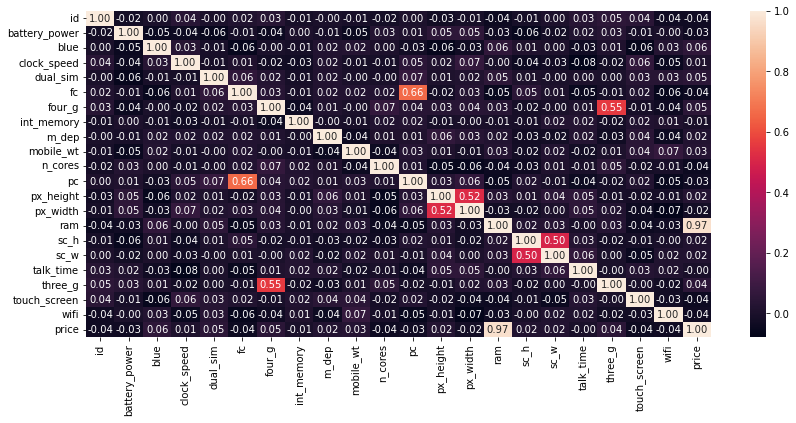

In [61]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr() , annot = True  , fmt='.2f')

In [62]:
data['n_cores'].value_counts()

4    142
1    138
2    134
5    130
3    127
8    121
7    107
6    101
Name: n_cores, dtype: int64

<AxesSubplot:xlabel='n_cores', ylabel='price'>

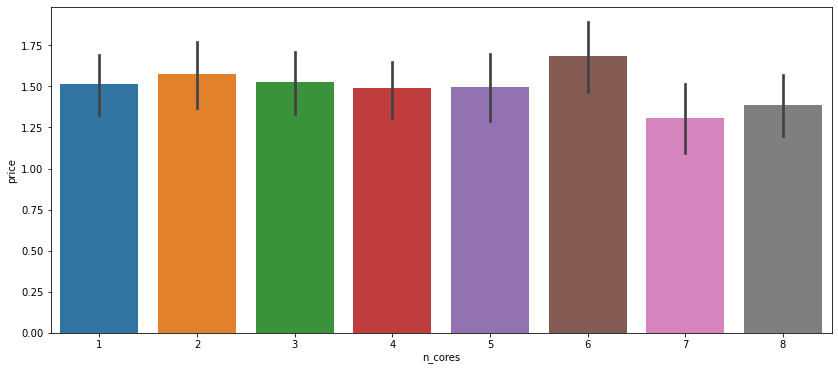

In [63]:
plt.figure(figsize=(14,6))
sns.barplot(x = "n_cores",  y = "price", data = data)

In [64]:
data.four_g.value_counts()

0    513
1    487
Name: four_g, dtype: int64

<AxesSubplot:>

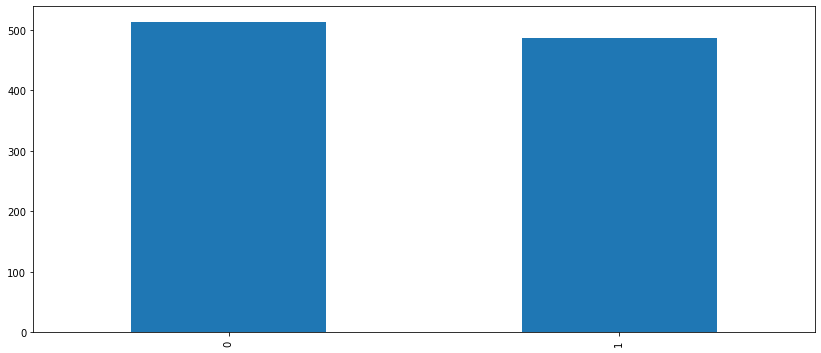

In [65]:
plt.figure(figsize=(14,6))
data.four_g.value_counts().plot(kind = 'bar')

C:\Users\DESKTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_power'>

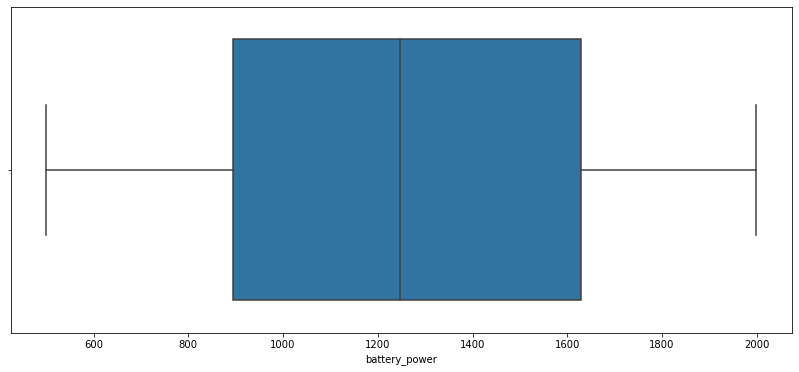

In [66]:
plt.figure(figsize=(14,6))
sns.boxplot(data.battery_power)

In [67]:
data['price'].value_counts()

2.0    250
1.0    250
0.0    250
3.0    249
Name: price, dtype: int64

<AxesSubplot:xlabel='price', ylabel='ram'>

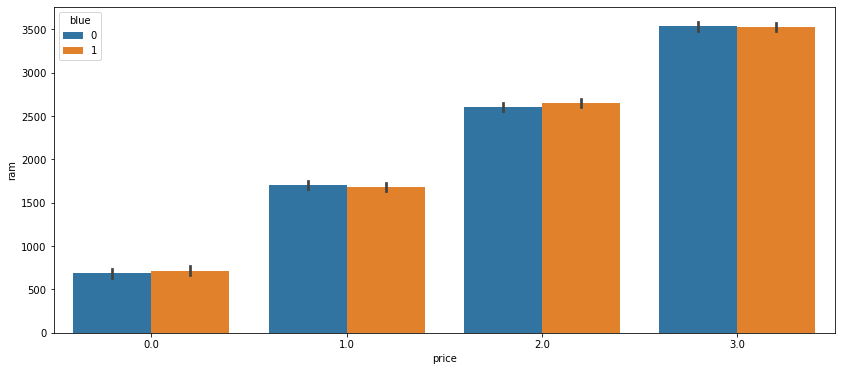

In [68]:
plt.figure(figsize=(14,6))
sns.barplot(data = data , x  =data['price'] , y = 'ram' , hue = 'blue')

<AxesSubplot:xlabel='talk_time', ylabel='price'>

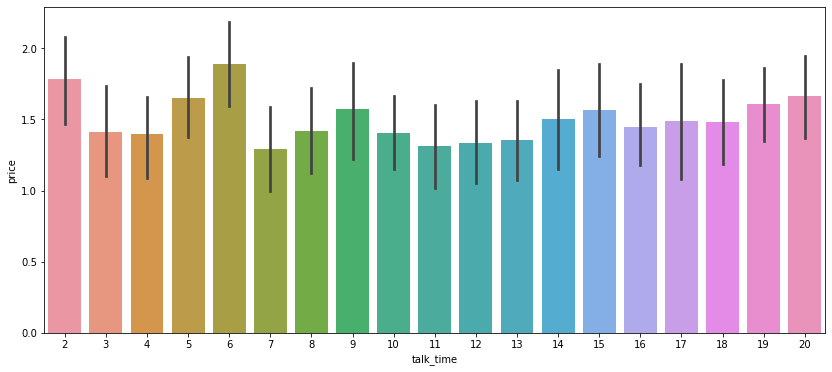

In [69]:
plt.figure(figsize=(14,6))
sns.barplot(data = data , x ='talk_time' , y= 'price' )

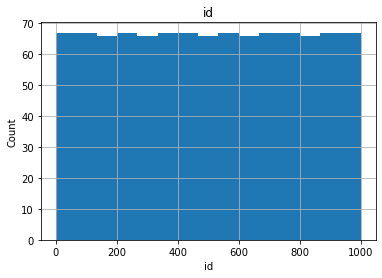

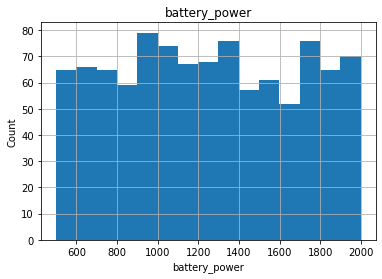

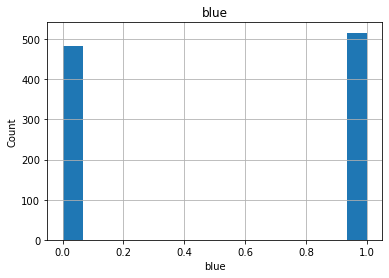

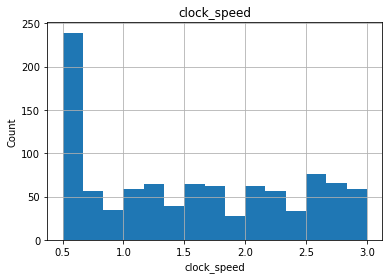

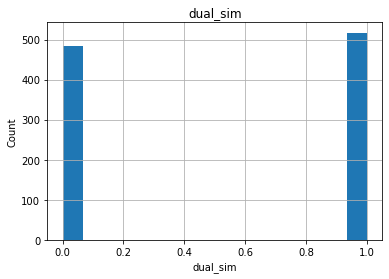

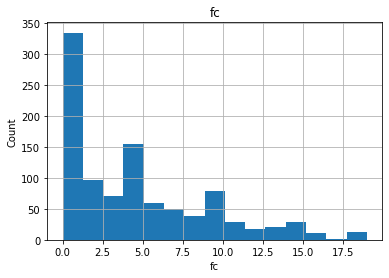

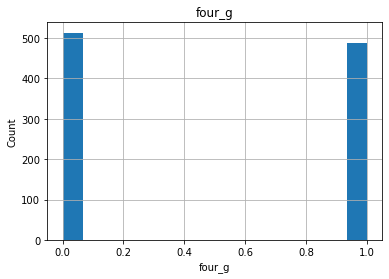

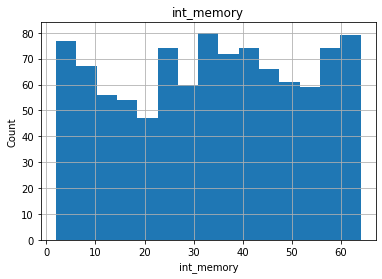

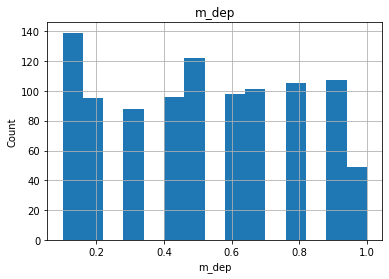

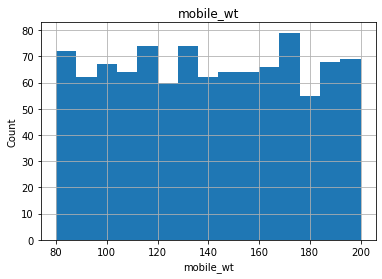

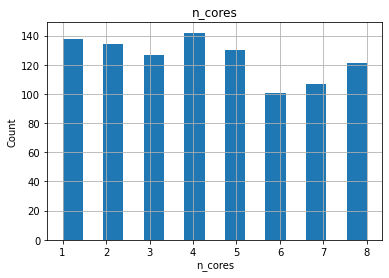

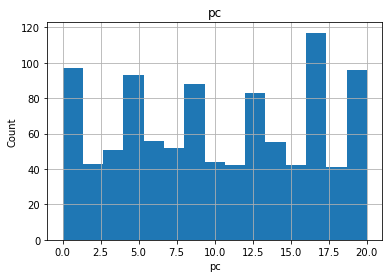

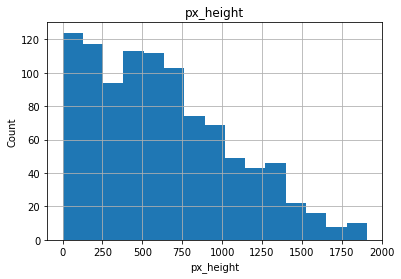

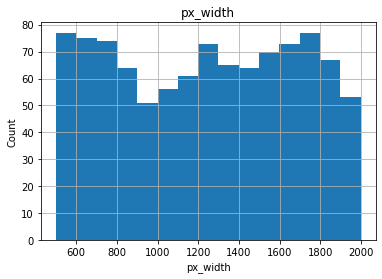

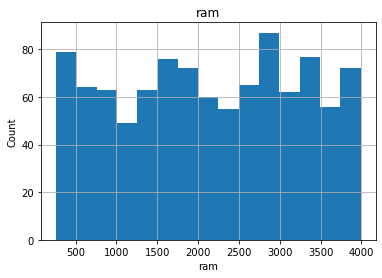

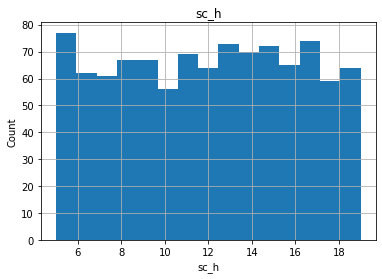

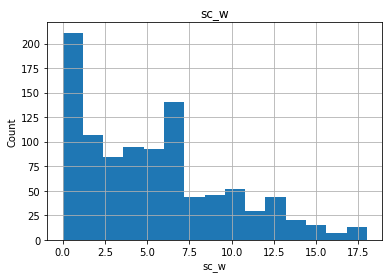

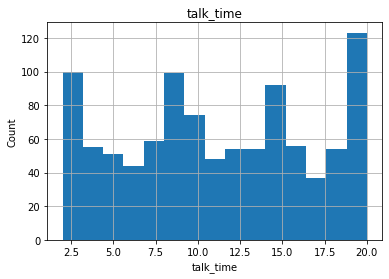

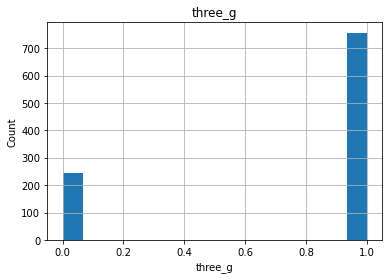

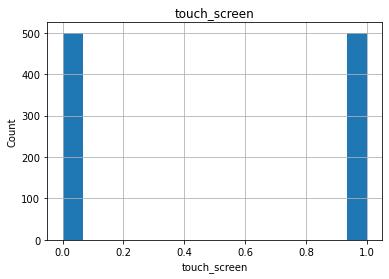

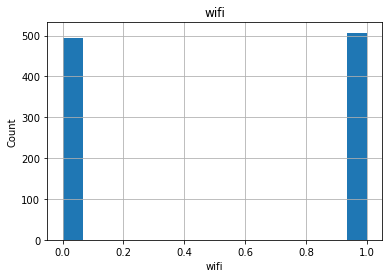

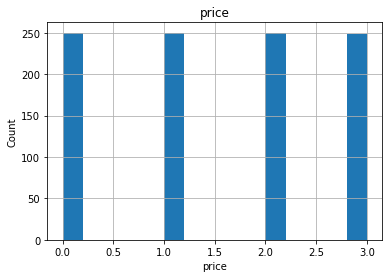

In [70]:
for feature in data:
    data=data.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

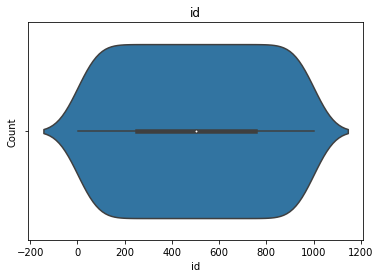

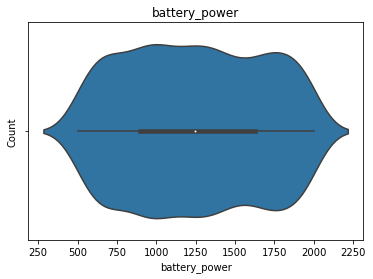

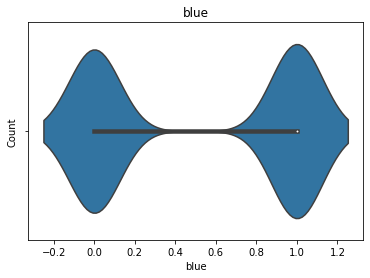

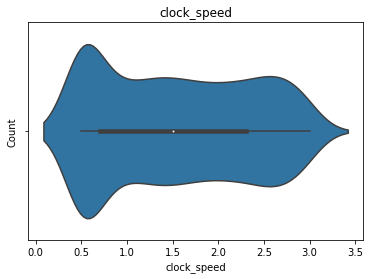

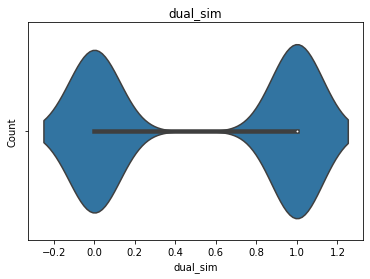

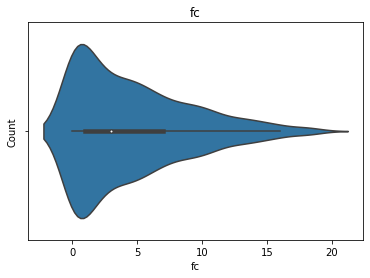

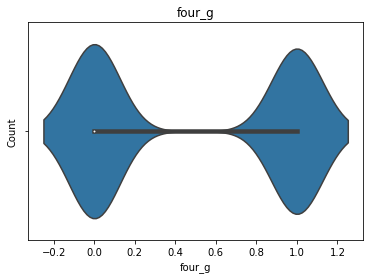

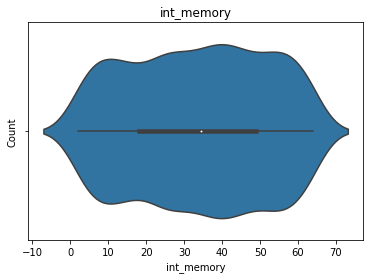

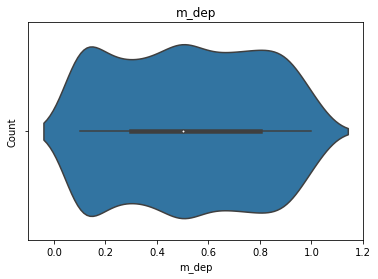

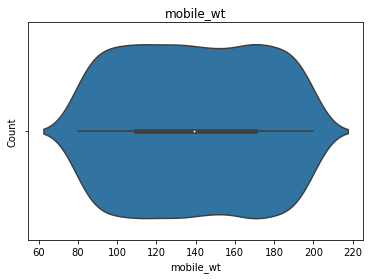

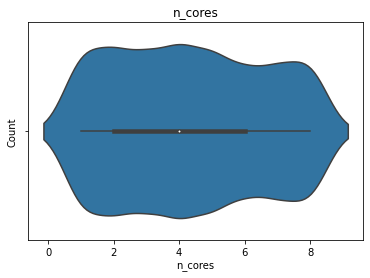

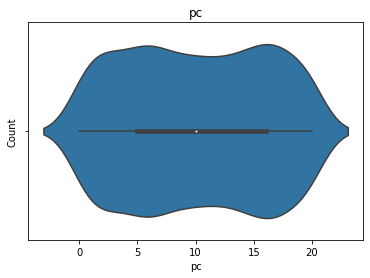

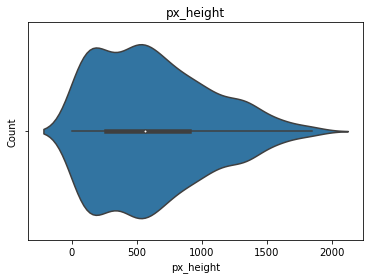

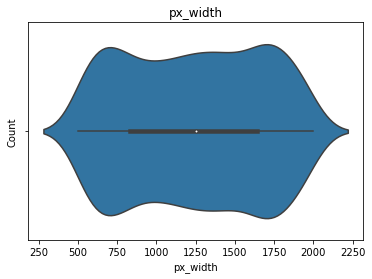

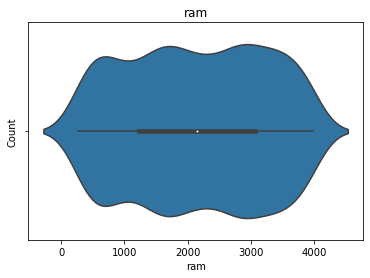

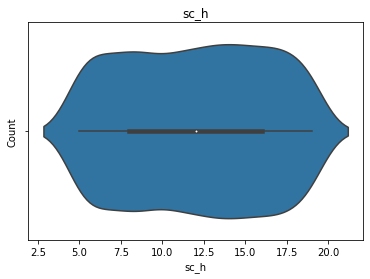

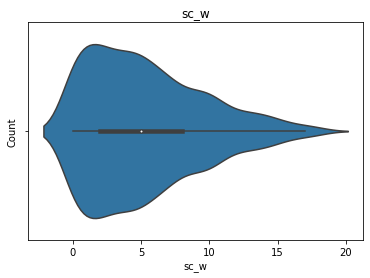

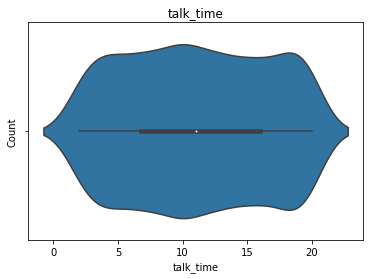

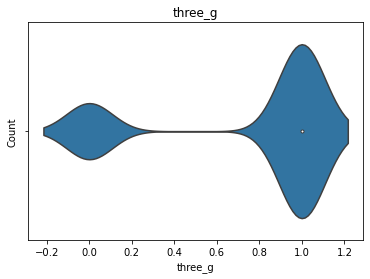

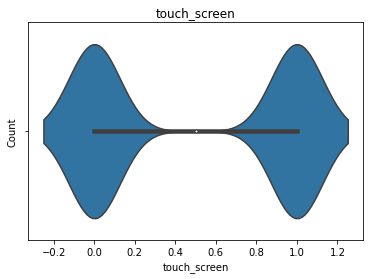

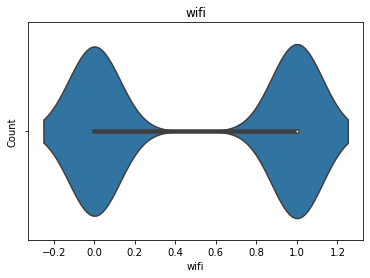

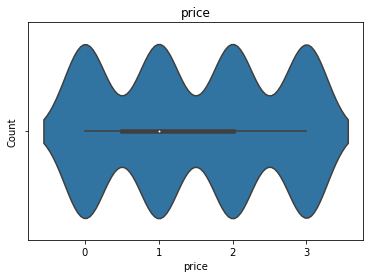

In [71]:
for feature in data:
    data=data.copy()
    sns.violinplot(data= data , x = feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

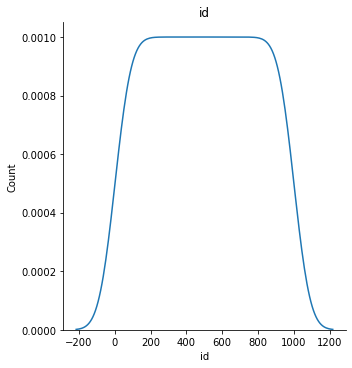

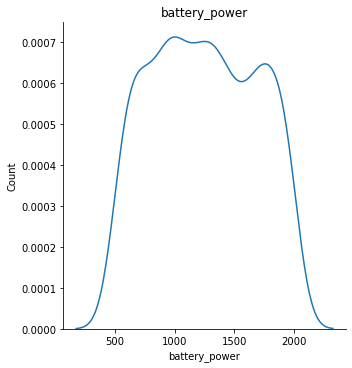

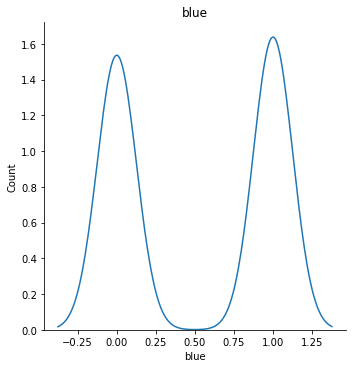

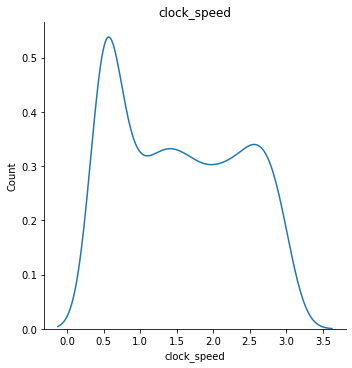

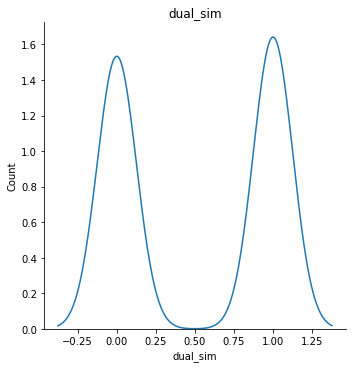

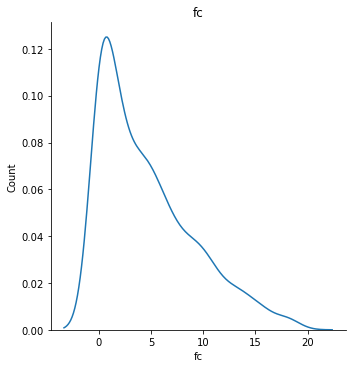

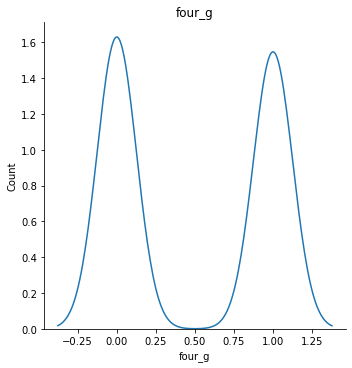

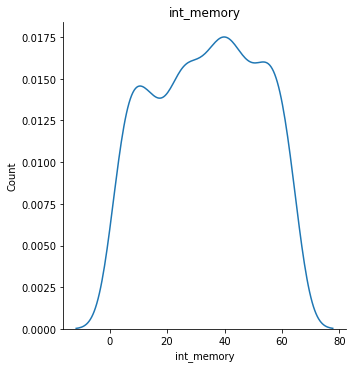

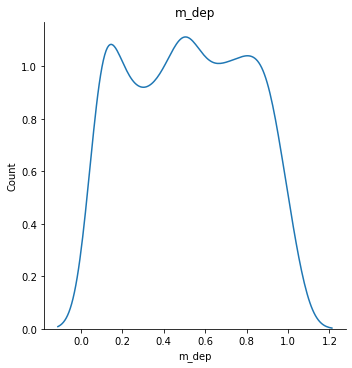

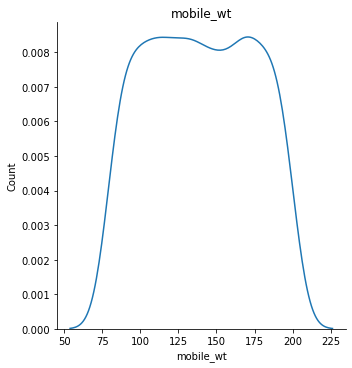

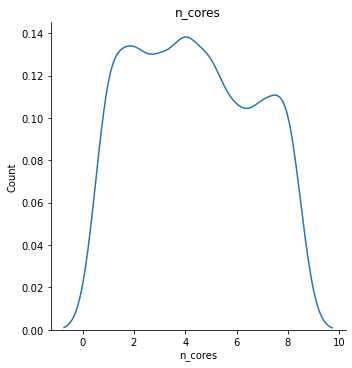

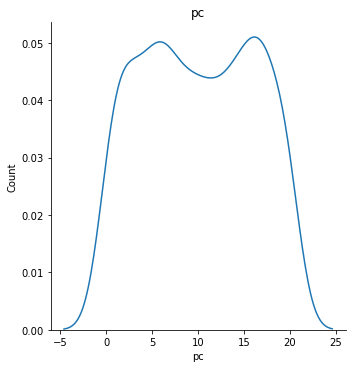

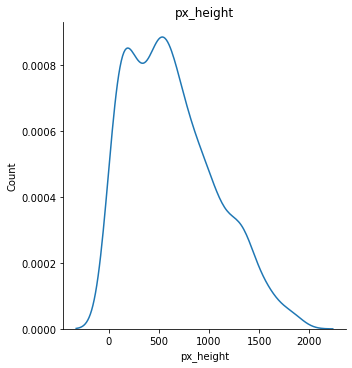

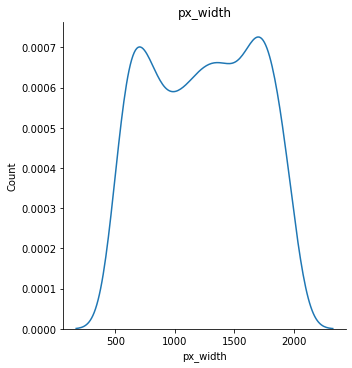

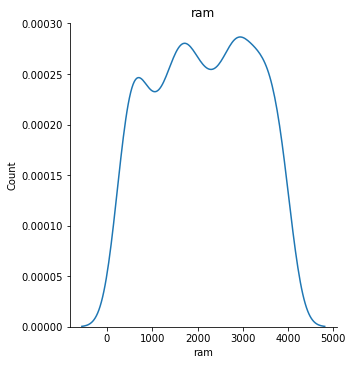

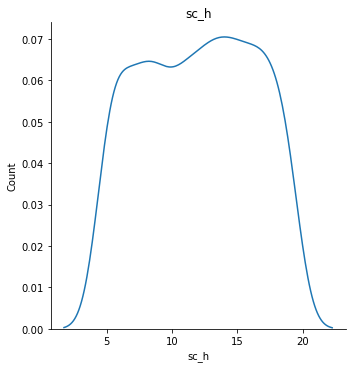

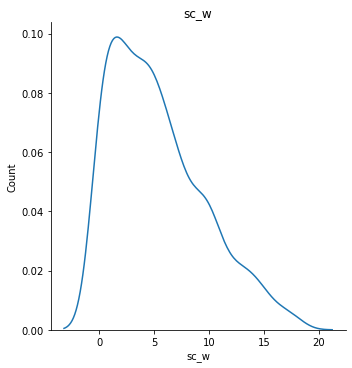

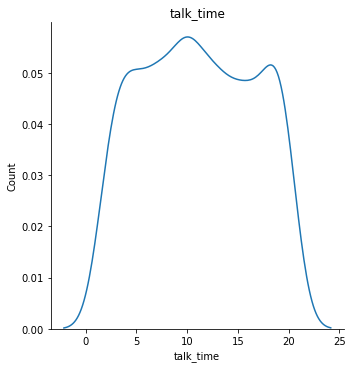

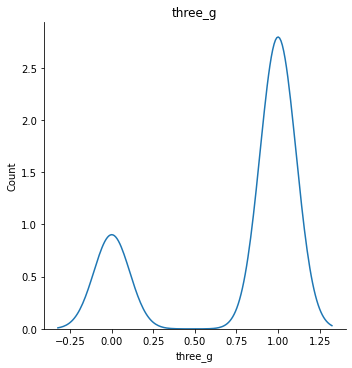

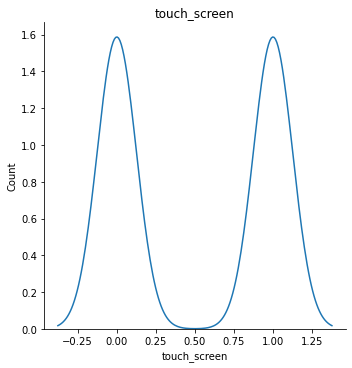

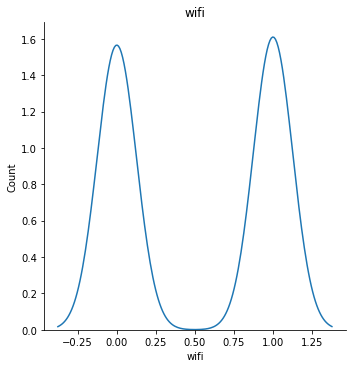

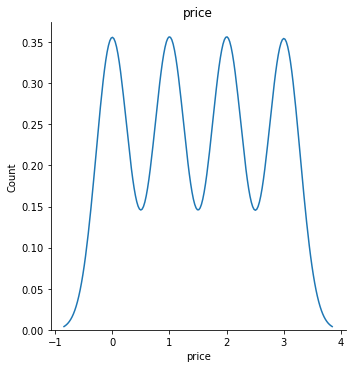

In [72]:
for feature in data:
    data=data.copy()
    sns.displot(data= data , x = feature , kind = 'kde')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

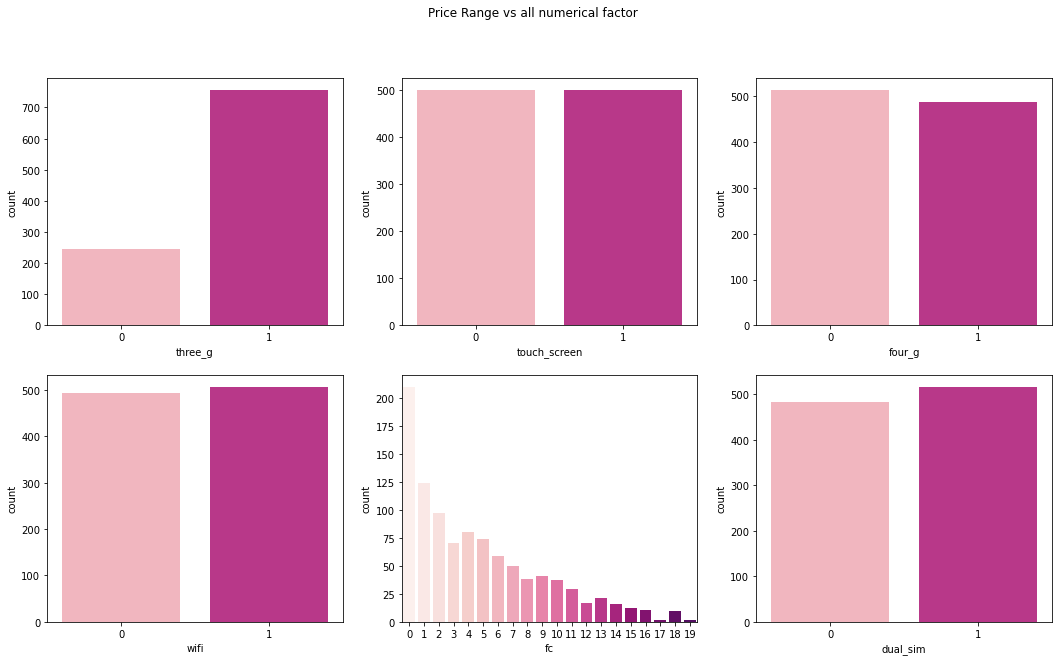

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=data, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=data, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=data, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=data, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = data, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = data, x ='dual_sim',palette='RdPu' )
plt.show()

In [80]:
%autosave 5

Autosaving every 5 seconds
